Make a plot of the results from `chan6` for use in the paper.

Based on `p2021-0624a_plot_chan6_results.ipynb`.


## Setup

In [1]:
import os
import os.path as osp

In [2]:
from datetime import datetime

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
import matplotlib as mpl

In [8]:
from matplotlib.gridspec import GridSpec

In [9]:
import simproc

In [10]:
import simproc.requesthandler.yaml_manager as yaml_manager
import simproc.requesthandler.locators as locators
import simproc.postproc.plotting as plotting
from simproc.postproc.plotseries import PlotSeries

## Functions copied from simproc methods

In [11]:
#Based on simproc.requesthandler.commandseq.WithCommandsRequest.load_csv
def load_csv(infpath,dtype_csv_fpath=None):
  if dtype_csv_fpath is None:
    df=pd.read_csv(fpt)
  else:
    dtype_ser=pd.read_csv(dtype_csv_fpath,index_col=0,squeeze=True,header=0)
    dtypes_dict=dtype_ser.to_dict()
    df=pd.read_csv(infpath,dtype=dtypes_dict)
  return df

In [12]:
#Based on simproc.postproc.plotting.FigureRequest.series_from_DataFrame
def series_from_df(df,xcol,ycol,query=None,label=None,metadata=None,errcol=None):
  #Select particular rows if requested
  if query is None or len(query)==0:
    qdf=df
  else:
    qdf=df.query(query)
  #Get the data for the series from the dataframe
  xvals=qdf[xcol]
  yvals=qdf[ycol]
  if errcol is not None:
    errvals=qdf[errcol]
  else:
    errvals = None
  #Instantiate the series
  series=PlotSeries(xvals=xvals,yvals=yvals,label=label,metadata=metadata,errors=errvals)
  return series

## Constants

In [13]:
width_query_tmpl="(deprot < 0.01) & (vary_Dlocal == {0}) & (vary_PMF == {1})"

In [14]:
deprot_query_tmpl="(width_nm > 1.9) & (tag != 'na_27pct') & (vary_Dlocal == {0}) & (vary_PMF == {1})"

In [15]:
series_bools=[(False,False),(True,False),(False,True),(True,True)]

In [16]:
series_D_text={False: "$D_{local}=D_{bulk}$", True: "$D_{local}$ from MD"}
series_PMF_text={False: "no PMF", True: "PMF from MD"}

In [17]:
series_titles=["{},\n{}".format(series_D_text[varyD],series_PMF_text[varyPMF]) for varyD,varyPMF in series_bools]
series_titles

['$D_{local}=D_{bulk}$,\nno PMF',
 '$D_{local}$ from MD,\nno PMF',
 '$D_{local}=D_{bulk}$,\nPMF from MD',
 '$D_{local}$ from MD,\nPMF from MD']

In [18]:
series_D_fmt={False:"o--",True:"o-"}
series_PMF_fmt={False:"r",True:"b"}

In [19]:
series_fmts=["{}{}".format(series_PMF_fmt[varyPMF],series_D_fmt[varyD]) for varyD,varyPMF in series_bools]
series_fmts

['ro--', 'ro-', 'bo--', 'bo-']

## Data folder

In [20]:
datadir=osp.abspath("../chan6")
assert osp.isdir(datadir)

In [21]:
o=locators.SetDataFolder(datafolder=datadir)

## Locators

In [22]:
#locators.folder_structure.keys()

In [23]:
locators.folder_structure.update(Unprocessed=['inputs','unprocessed'])

In [24]:
locators.folder_structure.update(Processed=['inputs','processed'])

In [25]:
locators.folder_structure.update(Manual=['inputs','manual'])

In [26]:
locators.folder_structure.update(JobFile=["solutions", 0])

In [27]:
locators.folder_structure.update(postprocfile=['postproc',0])

In [28]:
Unprocessed=lambda fname: self.renderstr(locators.Unprocessed(fname))

In [29]:
Processed=lambda fname: self.renderstr(locators.Processed(fname))

In [30]:
Manual=lambda fname: self.renderstr(locators.Manual(fname))

In [31]:
JobFile=lambda fname: self.renderstr(locators.JobFile(fname))

In [32]:
Postproc=lambda fname: self.renderstr(locators.postprocfile(fname))

## Dummy request for loading data

In [33]:
self=plotting.FigureRequest(name="chan6.plotting")

## Data file names and paths

Manual data

In [34]:
manualdata_fpath=Manual("other_input_values.yaml")
assert osp.isfile(manualdata_fpath)

Various tables

In [35]:
analytical_series_fpath=Manual("analytical_series.csv")
analytical_series_dtypes_fpath=Manual("analytical_series_dtypes.csv")
assert osp.isfile(analytical_series_fpath)
assert osp.isfile(analytical_series_dtypes_fpath)

In [36]:
quadratic_joblist_fpath=Manual("quadratic_joblist.csv")
quadratic_joblist_dtypes_fpath=Manual("quadratic_joblist_dtypes.csv")
assert osp.isfile(quadratic_joblist_fpath)
assert osp.isfile(quadratic_joblist_dtypes_fpath)

In [37]:
collected_fpath=Postproc("collected.csv")
collected_dtypes_fpath=Postproc("collected_dtypes.csv")
assert osp.isfile(collected_fpath)
assert osp.isfile(collected_dtypes_fpath)

In [38]:
collected_quad_fpath=Postproc("collected_quad.csv")
collected_quad_dtypes_fpath=Postproc("collected_quad_dtypes.csv")
assert osp.isfile(collected_quad_fpath)
assert osp.isfile(collected_quad_dtypes_fpath)

In [39]:
joblist_fpath=JobFile("joblist.csv")
joblist_dtypes_fpath=JobFile("joblist_dtypes.csv")
assert osp.isfile(joblist_fpath)
assert osp.isfile(joblist_dtypes_fpath)

Plot output folder

In [40]:
postproc_top=osp.join(datadir,"postproc","notebooks")
assert osp.isdir(postproc_top)
#postproc_top

## Read the input data

In [41]:
other_input_values=yaml_manager.readfile(manualdata_fpath)

In [42]:
meshes_by_tag=other_input_values["meshes_by_tag"]
channel_widths=other_input_values["channel_widths"]
deprotonation_levels=other_input_values["deprotonation_levels"]

In [43]:
analytical_series=load_csv(analytical_series_fpath,analytical_series_dtypes_fpath)

In [44]:
joblist=load_csv(joblist_fpath,joblist_dtypes_fpath)

In [45]:
quadratic_joblist=load_csv(quadratic_joblist_fpath,quadratic_joblist_dtypes_fpath)

In [46]:
collected=load_csv(collected_fpath,collected_dtypes_fpath)

In [47]:
collected_quad=load_csv(collected_quad_fpath,collected_quad_dtypes_fpath)

Show the columns in all the tables.

In [48]:
analytical_series.columns

Index(['channel_width', 'analytical_Deff'], dtype='object')

In [49]:
joblist.columns

Index(['job_id', 'tag', 'use_PMF', 'use_Dlocal', 'results_path',
       'homog_results_path'],
      dtype='object')

In [50]:
quadratic_joblist.columns

Index(['job_id', 'tag', 'A', 'B', 'Zmid', 'Zrefl', 'analytical_Deff',
       'results_path', 'homog_results_path'],
      dtype='object')

In [51]:
collected.columns

Index(['job_id', 'tag', 'vary_Dlocal', 'vary_PMF', 'actual_width',
       'cell_delta_x', 'full_thickness', 'area_start', 'area_end', 'area_mid',
       'flux_start', 'flux_end', 'flux_mid', 'Deff', 'Dnoslab', 'full_volume',
       'mesh_volume', 'Dbar', 'Deff_homog', 'width_nm', 'deprot'],
      dtype='object')

In [52]:
collected_quad.columns

Index(['job_id', 'tag', 'actual_width', 'cell_delta_x', 'full_thickness',
       'area_start', 'area_end', 'area_mid', 'flux_start', 'flux_end',
       'flux_mid', 'Deff', 'Dnoslab', 'full_volume', 'mesh_volume', 'Dbar',
       'Deff_homog', 'width_nm', 'deprot'],
      dtype='object')

## Output plot paths

In [53]:
datestr=datetime.now().strftime("%Y_%m%d")
datestr

'2021_0918'

In [54]:
outdir=osp.join(postproc_top,datestr)

In [55]:
if not osp.isdir(outdir):
  os.makedirs(outdir)
assert osp.isdir(outdir)

## Plots

In [56]:
linewidth=2 #pts

In [57]:
markersize_vbig=12 #pts
markersize_big=10 #pts
markersize_small=7 #pts

In [58]:
legend_ordering=[5,6,0,1,4,2,3]

In [59]:
collected["prot"]=1-collected["deprot"]

In [60]:
collected.columns

Index(['job_id', 'tag', 'vary_Dlocal', 'vary_PMF', 'actual_width',
       'cell_delta_x', 'full_thickness', 'area_start', 'area_end', 'area_mid',
       'flux_start', 'flux_end', 'flux_mid', 'Deff', 'Dnoslab', 'full_volume',
       'mesh_volume', 'Dbar', 'Deff_homog', 'width_nm', 'deprot', 'prot'],
      dtype='object')

In [61]:
ylim=(0,1)

In [62]:
plot_an_D=series_from_df(analytical_series,"channel_width","analytical_Deff",
                                 label="Theoretical result\nfor $D_{local}=D_{bulk}$,\nno PMF")

In [63]:
deprot_vals=collected["prot"].unique()
deprot_vals.sort()
deprot_vals

array([0.5 , 0.73, 1.  ])

In [64]:
deprot_analytical=np.array([analytical_series.loc[2.0,'analytical_Deff']]*3)
deprot_analytical

array([0.3030303, 0.3030303, 0.3030303])

In [65]:
plot_an_PMF_x=[channel_widths[tag] for tag in quadratic_joblist["tag"]]
plot_an_PMF_y=quadratic_joblist["analytical_Deff"]
plot_an_PMF_label="Theoretical result\nfor $D_{local}=D_{bulk}$,\nquadratic PMF"

In [66]:
plot_quad_PMF_x=collected_quad["width_nm"]
plot_quad_PMF_y=collected_quad["Deff_homog"]
plot_quad_PMF_label="$D_{local}=D_{bulk}$,\nquadratic PMF"

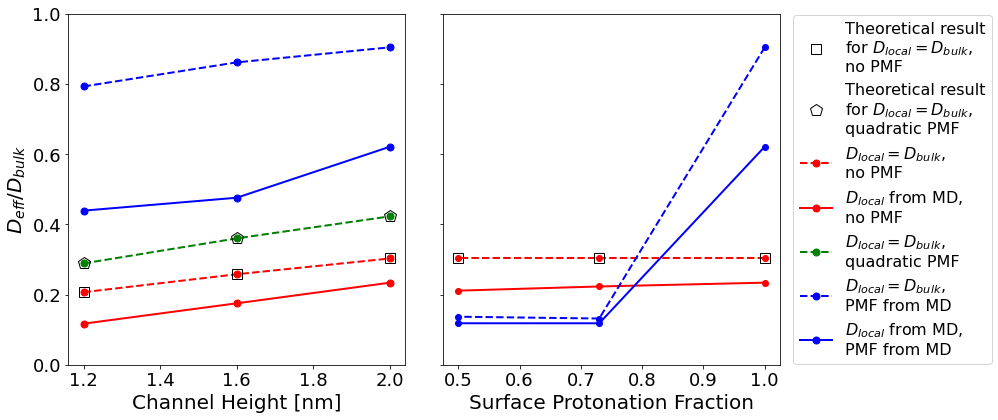

In [67]:
fig=plt.figure(figsize=(14,6))
gs=GridSpec(1,10)
ax_w=fig.add_subplot(gs[0,0:4])
ax_d=fig.add_subplot(gs[0,4:8])
ax_l=fig.add_subplot(gs[0,8:])

#Width plot
for idx in range(4):
  the_query=width_query_tmpl.format(*series_bools[idx])
  ser=series_from_df(collected,"width_nm","Deff_homog",query=the_query,label=series_titles[idx])
  newh=ser.add_to_axes(ax_w,series_fmts[idx],lw=linewidth,ms=markersize_small)
h_quad_PMF=ax_w.plot(plot_quad_PMF_x,plot_quad_PMF_y,"o--g",
                     label=plot_quad_PMF_label,lw=linewidth,ms=markersize_small)
h_an_D=plot_an_D.add_to_axes(ax_w,"sk",markerfacecolor="none",lw=linewidth,ms=markersize_big)
h_an_PMF=ax_w.plot(plot_an_PMF_x,plot_an_PMF_y,"pk",
                   markerfacecolor="none",label=plot_an_PMF_label,lw=linewidth,ms=markersize_vbig)
legend_handles, legend_labels = ax_w.get_legend_handles_labels()
o=ax_w.set_ylim(ylim)
o=ax_w.set_xlabel('Channel Height [nm]',fontsize=20)
o=ax_w.set_ylabel('$D_{eff}/D_{bulk}$',fontsize=20)
o=ax_w.tick_params(axis="x",labelsize=18)
o=ax_w.tick_params(axis="y",labelsize=18)


#Deprotonation plot
for idx in range(4):
  the_query=deprot_query_tmpl.format(*series_bools[idx])
  ser=series_from_df(collected,"prot","Deff_homog",query=the_query,label=series_titles[idx])
  newh=ser.add_to_axes(ax_d,series_fmts[idx],lw=linewidth)
o=ax_d.plot(deprot_vals,deprot_analytical,"ks",markerfacecolor="none",lw=linewidth,ms=markersize_big)
o=ax_d.set_ylim(ylim)
o=ax_d.set_xlabel("Surface Protonation Fraction",fontsize=20)
o=ax_d.tick_params(axis="x",labelsize=18)
o=ax_d.tick_params(axis="y", labelleft=False)
# o=ax_d.tick_params(axis="y",labelsize=18)

#Legend
reord_handles=[legend_handles[idx] for idx in legend_ordering]
reord_labels=[legend_labels[idx] for idx in legend_ordering]
o=ax_l.axis("off")
o=ax_l.legend(reord_handles,reord_labels,loc="center",fontsize=16)
# o=ax_l.legend(handles=legend_handles,loc="center")

#Save
fig.tight_layout()
plot_fpath=osp.join(outdir,"homogenization_plot_2.png")
fig.savefig(plot_fpath,dpi=150)